In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [2]:
# Load training dataset
train_df = pd.read_csv("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Imarticus Hackathon\\ABC_Bank_train_data.csv")

In [3]:
# Load test dataset
test_df = pd.read_csv("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Imarticus Hackathon\\ABC_Bank_test_data.csv")

In [4]:
train_df.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [5]:
#Checking for datatype of columns and other info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [6]:
#Checking for NULL values
train_df.isnull().sum()

serial number        0
account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [7]:
#Deleting rows with null values
train_df=train_df.dropna()

In [8]:
#Finally rows with no null values
train_df.isnull().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

# Statistical Analysis And Univariate Analysis of Each Variable

I have performed ANNOVA test for those columns which are continous and Chi-Square tests for those columns which are categorical to find out if a particular column has an important say in predicting the the group no.I have dropped all those columns whose p>0.05(indicating that a particular has little or no predictive power) 

In [9]:
#Group_no(Target variable)

In [10]:
train_df['Group_no'].value_counts()

2    335
3    236
1    190
Name: Group_no, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

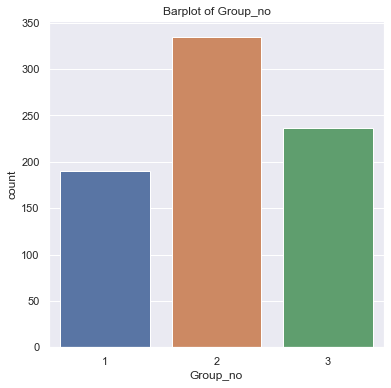

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['Group_no'])
plt.title('Barplot of Group_no')
plt.show

#There is under representation of certain groups hence we will use SMOTE to balance the data before fitting it into the model


In [12]:
#account_info(ordered)

In [13]:
train_df['account_info'].value_counts()

A14    290
A12    220
A11    199
A13     52
Name: account_info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

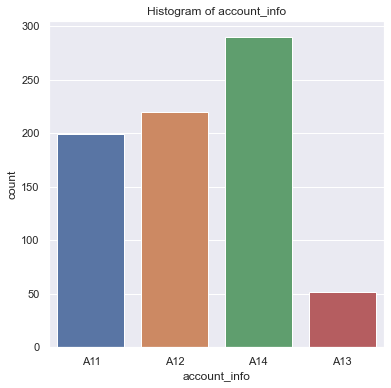

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['account_info'])
plt.title('Histogram of account_info') 
plt.show

In [15]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.account_info)
chi2_contingency(ct_job, correction = False)#good predictor


(17.398912675595437,
 0.007923750586760361,
 6,
 array([[ 49.68462549,  54.92772668,  12.98291721,  72.40473062],
        [ 87.60183968,  96.84625493,  22.89093298, 127.6609724 ],
        [ 61.71353482,  68.2260184 ,  16.1261498 ,  89.93429698]]))

In [16]:
#duration_month(numerical)

In [17]:
train_df['duration_month'].value_counts()

24    137
12    136
18     90
6      63
36     60
15     44
9      39
48     38
30     28
10     24
21     22
60     11
27     10
42      8
20      5
8       5
11      5
7       5
14      4
4       4
39      4
33      3
13      3
45      2
54      2
22      2
5       1
72      1
26      1
47      1
28      1
16      1
40      1
Name: duration_month, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

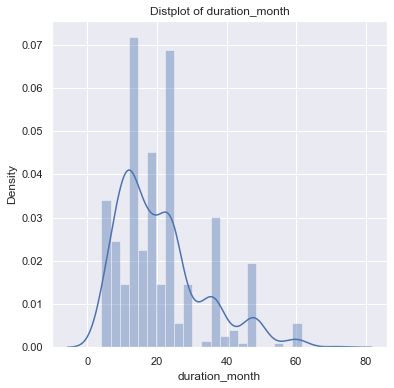

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(train_df['duration_month'])
plt.title('Distplot of duration_month') 
plt.show

<AxesSubplot:>

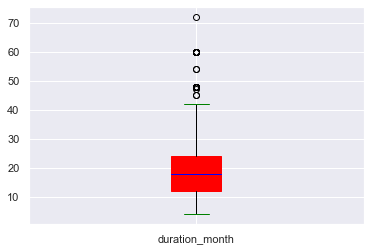

In [19]:
duration_month=train_df['duration_month']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
duration_month.plot.box(color=props2,patch_artist=True,vert=True)

As you can see from above box plot,there are some outliers present in the feature.It is important to handel them for better accuracy of the model.Hence,I will be capping the outliers using IQR method. (I have Capped the otliers for all the features whereever outliers are present)  

In [20]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [21]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [22]:
def remove_outlier(df_in,feature):
    Q1=df_in[feature].quantile(.25)
    Q3=df_in[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    df_out=df_in.loc[(df_in[feature]>lower_boundary) & (df_in[feature]<upper_boundary)]
    
    return df_out

In [23]:
lower_duration_month,upper_duration_month=find_boundaries(train_df,'duration_month')
print(lower_duration_month,upper_duration_month)

-6.0 42.0


In [24]:
outliers = find_outliers_IQR(train_df['duration_month'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 55


In [25]:
train_df['duration_month']=np.where(train_df['duration_month']>upper_duration_month,upper_duration_month,
                         np.where(train_df['duration_month']<lower_duration_month,lower_duration_month,train_df['duration_month']))

<AxesSubplot:>

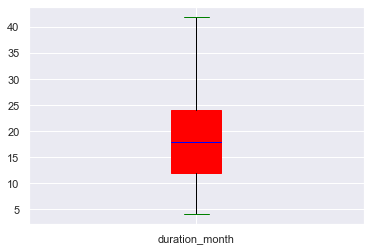

In [26]:
duration_month=train_df['duration_month']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
duration_month.plot.box(color=props2,patch_artist=True,vert=True)

In [27]:
#is it a good predictor?
#Annova
annova=ols('duration_month ~ Group_no',data=train_df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5)) #good predictor

               sum_sq     df          F  PR(>F)
Group_no  31529.95980    1.0  431.71308     0.0
Residual  55433.20446  759.0        NaN     NaN


In [28]:
#credit_history(Categorical)

In [29]:
train_df['credit_history'].value_counts()

A32    400
A34    227
A33     70
A31     33
A30     31
Name: credit_history, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

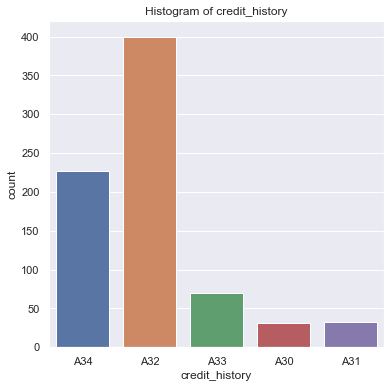

In [30]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['credit_history'])
plt.title('Histogram of credit_history') 
plt.show

In [31]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.credit_history)
chi2_contingency(ct_job, correction = False)#good predictor

(33.311024491313276,
 5.412633986820866e-05,
 8,
 array([[  7.73981603,   8.239159  ,  99.86859396,  17.47700394,
          56.67542707],
        [ 13.64651774,  14.52693824, 176.08409987,  30.81471748,
          99.92772668],
        [  9.61366623,  10.23390276, 124.04730618,  21.70827858,
          70.39684625]]))

In [32]:
#purpose(Categorical)

In [33]:
train_df['purpose'].value_counts()

A43     209
A40     176
A42     140
A41      78
A49      74
A46      42
A45      19
A410     10
A44       8
A48       5
Name: purpose, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

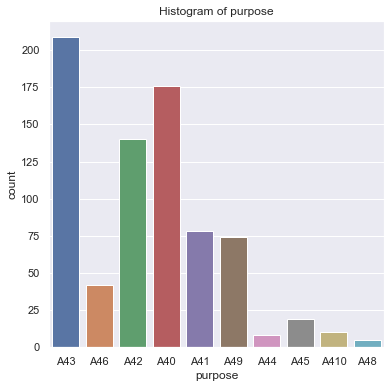

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['purpose'])
plt.title('Histogram of purpose') 
plt.show

In [35]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.purpose)
chi2_contingency(ct_job, correction = False)#good predictor

(132.02201970287447,
 2.1792445715980387e-19,
 18,
 array([[43.94218134, 19.47437582,  2.49671485, 34.95400788, 52.18134034,
          1.99737188,  4.74375821, 10.48620237,  1.24835742, 18.47568988],
        [77.47700394, 34.33639947,  4.4021025 , 61.62943495, 92.00394218,
          3.521682  ,  8.36399474, 18.48883049,  2.20105125, 32.57555848],
        [54.58081472, 24.1892247 ,  3.10118265, 43.41655716, 64.81471748,
          2.48094612,  5.89224704, 13.02496715,  1.55059133, 22.94875164]]))

In [36]:
#savings_account(ordered)

In [37]:
train_df['savings_account'].value_counts()

A61    453
A65    137
A62     86
A63     46
A64     39
Name: savings_account, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

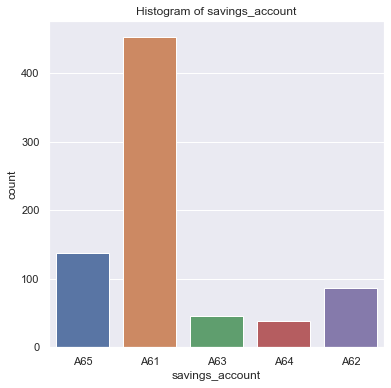

In [38]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['savings_account'])
plt.title('Histogram of savings_account') 
plt.show

In [39]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.savings_account)
chi2_contingency(ct_job, correction = False)#good predictor

(17.05024576511371,
 0.029590106583568275,
 8,
 array([[113.10118265,  21.4717477 ,  11.4848883 ,   9.73718791,
          34.20499343],
        [199.4152431 ,  37.85808147,  20.24967148,  17.16819974,
          60.3088042 ],
        [140.48357424,  26.67017083,  14.26544021,  12.09461235,
          42.48620237]]))

In [40]:
#employment_st(ordered)

In [41]:
train_df['employment_st'].value_counts()

A73    254
A75    193
A74    138
A72    128
A71     48
Name: employment_st, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

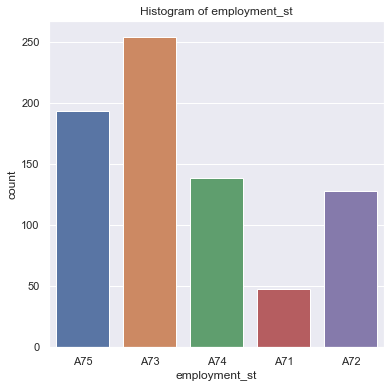

In [42]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['employment_st'])
plt.title('Histogram of employment_st') 
plt.show

In [43]:
#is it a good predictor?
#chi-square
ct_job=pd.crosstab(train_df.Group_no, train_df.employment_st)
chi2_contingency(ct_job, correction = False) #bad predictor

(7.386355357196549,
 0.4955781168943669,
 8,
 array([[ 11.98423127,  31.95795007,  63.41655716,  34.45466491,
          48.18659658],
        [ 21.13009198,  56.34691196, 111.81340342,  60.74901445,
          84.96057819],
        [ 14.88567674,  39.69513798,  78.77003942,  42.79632063,
          59.85282523]]))

In [44]:
train_df= train_df.drop(['employment_st'], axis=1)

In [45]:
#poi(ordered)

In [46]:
train_df['poi'].value_counts()

4.0    349
2.0    182
3.0    118
1.0    112
Name: poi, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

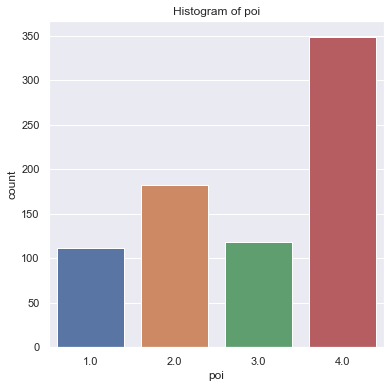

In [47]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['poi'])
plt.title('Histogram of poi') 
plt.show

In [48]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.poi)
chi2_contingency(ct_job, correction = False) #good predictor

(54.18885842154453,
 6.757704780621192e-10,
 6,
 array([[ 27.96320631,  45.44021025,  29.46123522,  87.13534823],
        [ 49.30354796,  80.11826544,  51.94480946, 153.63337714],
        [ 34.73324573,  56.44152431,  36.59395532, 108.23127464]]))

In [49]:
#personal_status(categorical)

In [50]:
train_df['personal_status'].value_counts()

A93    419
A92    243
A94     66
A91     33
Name: personal_status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

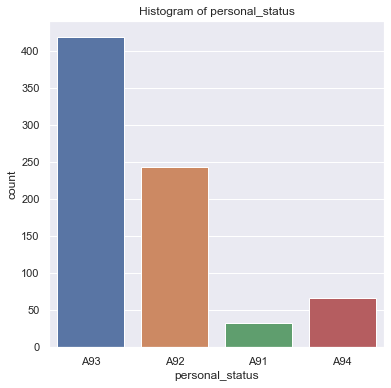

In [51]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['personal_status'])
plt.title('Histogram of personal_status') 
plt.show

In [52]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.personal_status)
chi2_contingency(ct_job, correction = False) #good predictor

(34.107583516407395,
 6.4131235285048395e-06,
 6,
 array([[  8.239159  ,  60.67017083, 104.61235217,  16.478318  ],
        [ 14.52693824, 106.97109067, 184.44809461,  29.05387648],
        [ 10.23390276,  75.3587385 , 129.93955322,  20.46780552]]))

In [53]:
#guarantors(categorical)

In [54]:
train_df['gurantors'].value_counts()

A101    689
A103     42
A102     30
Name: gurantors, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

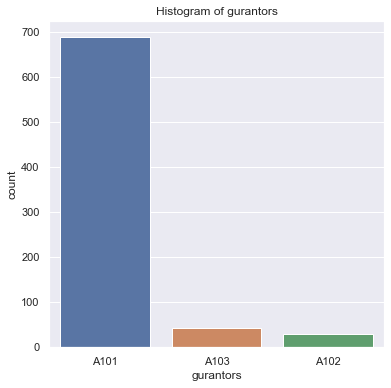

In [55]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['gurantors'])
plt.title('Histogram of gurantors') 
plt.show

In [56]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.gurantors)
chi2_contingency(ct_job, correction = False) #bad predictor

(8.755788235254755,
 0.06750205426360173,
 4,
 array([[172.02365309,   7.49014455,  10.48620237],
        [303.30486202,  13.20630749,  18.48883049],
        [213.67148489,   9.30354796,  13.02496715]]))

In [57]:
train_df= train_df.drop(['gurantors'], axis=1)

In [58]:
#resident_since(categorical)

In [59]:
train_df['resident_since'].value_counts()

4    318
2    224
3    116
1    103
Name: resident_since, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

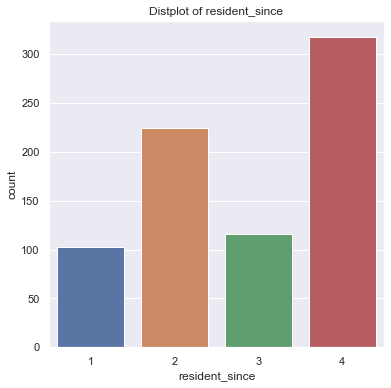

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['resident_since'])
plt.title('Distplot of resident_since') 
plt.show

In [61]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.resident_since)
chi2_contingency(ct_job, correction = False) #bad predictor

(5.972542955774193,
 0.4262728708046929,
 6,
 array([[ 25.71616294,  55.92641261,  28.96189225,  79.39553219],
        [ 45.34165572,  98.60709593,  51.06438896, 139.9868594 ],
        [ 31.94218134,  69.46649146,  35.97371879,  98.61760841]]))

In [62]:
train_df= train_df.drop(['resident_since'], axis=1)

In [63]:
#property_type(Categorical)

In [64]:
train_df['property_type'].value_counts()

A123    252
A121    217
A122    169
A124    123
Name: property_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

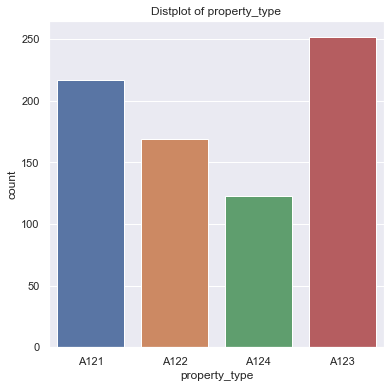

In [65]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['property_type'])
plt.title('Distplot of property_type') 
plt.show

In [66]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no, train_df.property_type)
chi2_contingency(ct_job, correction = False) #good predictor

(87.54056201860142,
 9.816908660314244e-17,
 6,
 array([[ 54.17871222,  42.19448095,  62.91721419,  30.70959264],
        [ 95.52562418,  74.39553219, 110.93298292,  54.14586071],
        [ 67.2956636 ,  52.40998686,  78.14980289,  38.14454665]]))

In [67]:
#age(numerical)

<function matplotlib.pyplot.show(close=None, block=None)>

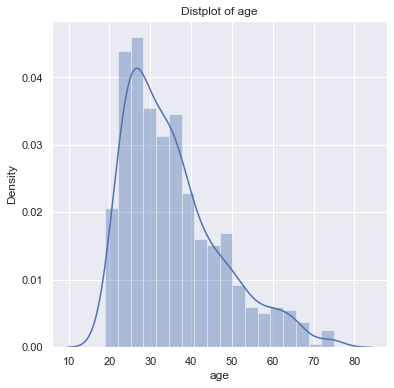

In [68]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(train_df['age'])
plt.title('Distplot of age') 
plt.show   

<AxesSubplot:>

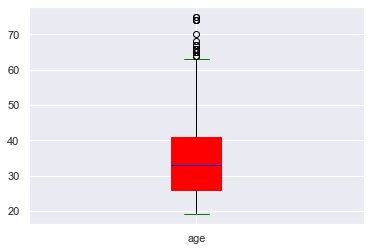

In [69]:
age=train_df['age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [70]:
lower_age,upper_age=find_boundaries(train_df,'age')
print(lower_age,upper_age)

3.5 63.5


In [71]:
outliers = find_outliers_IQR(train_df['age'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 22


In [72]:
train_df['age']=np.where(train_df['age']>upper_age,upper_age,
                         np.where(train_df['age']<lower_age,lower_age,train_df['age']))

<AxesSubplot:>

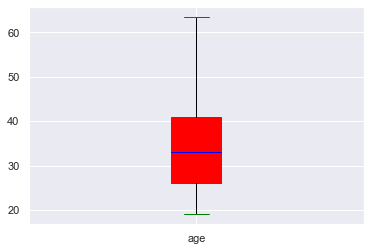

In [73]:
age=train_df['age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [74]:
#is it a good predictor?
#Annova
annova=ols('age ~ Group_no',data=train_df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5)) #Bad Predictor

               sum_sq     df       F   PR(>F)
Group_no      6.51307    1.0  0.0514  0.82071
Residual  96179.05132  759.0     NaN      NaN


In [75]:
train_df= train_df.drop(['age'],axis=1)

In [76]:
#installment_type(categorical)

In [77]:
train_df['installment_type'].value_counts()

A143    624
A141    103
A142     34
Name: installment_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

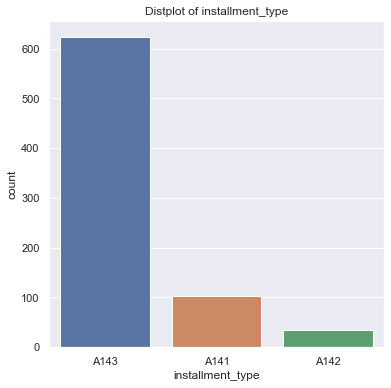

In [78]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['installment_type'])
plt.title('Distplot of installment_type') 
plt.show

In [79]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.installment_type)
chi2_contingency(ct_job, correction = False) #bad predictor

(3.0496240459929074,
 0.5495555549282711,
 4,
 array([[ 25.71616294,   8.48883049, 155.79500657],
        [ 45.34165572,  14.96714849, 274.6911958 ],
        [ 31.94218134,  10.54402102, 193.51379763]]))

In [80]:
train_df= train_df.drop(['installment_type'],axis=1)

In [81]:
#housing_type(categorical)

In [82]:
train_df['housing_type'].value_counts()

A152    540
A151    134
A153     87
Name: housing_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

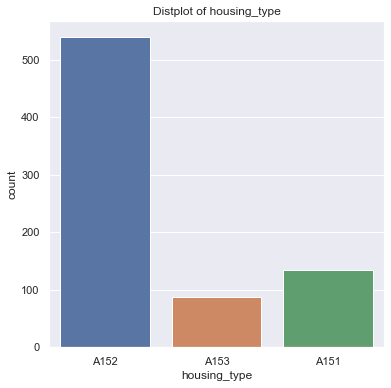

In [83]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['housing_type'])
plt.title('Distplot of housing_type') 
plt.show

In [84]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.housing_type)
chi2_contingency(ct_job, correction = False) #good predictor

(31.56629325381164,
 2.346064250189905e-06,
 4,
 array([[ 33.45597898, 134.82260184,  21.72141919],
        [ 58.98817346, 237.71353482,  38.29829172],
        [ 41.55584757, 167.46386334,  26.98028909]]))

In [85]:
#credits_no(categorical)

In [86]:
train_df['credits_no'].value_counts()

1    488
2    249
3     20
4      4
Name: credits_no, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

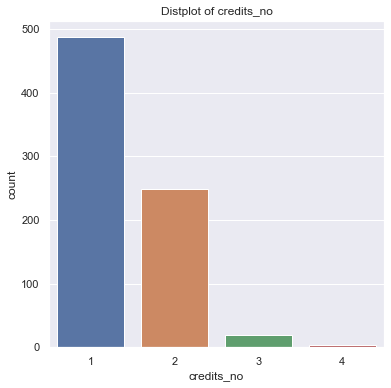

In [87]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['credits_no'])
plt.title('Distplot of credits_no') 
plt.show

In [88]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.credits_no)
chi2_contingency(ct_job, correction = False) #bad predictor

(11.984313720513489,
 0.062319662288139635,
 6,
 array([[121.83968463,  62.16819974,   4.9934297 ,   0.99868594],
        [214.82260184, 109.61235217,   8.80420499,   1.760841  ],
        [151.33771353,  77.21944809,   6.20236531,   1.24047306]]))

In [89]:
train_df= train_df.drop(['credits_no'],axis=1)

In [90]:
#job_type(categprical)

In [91]:
train_df['job_type'].value_counts()

A173    479
A172    151
A174    114
A171     17
Name: job_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

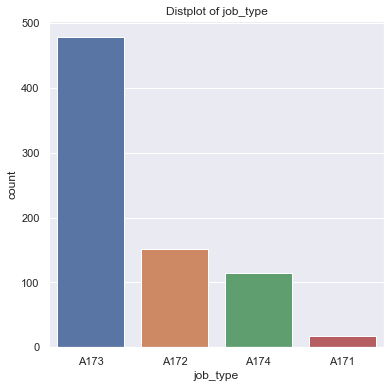

In [92]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['job_type'])
plt.title('Distplot of job_type') 
plt.show

In [93]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.job_type)
chi2_contingency(ct_job, correction = False) #good predictor

(98.67659813412963,
 4.737916506831959e-19,
 6,
 array([[  4.24441524,  37.70039422, 119.59264126,  28.46254928],
        [  7.48357424,  66.4717477 , 210.86070959,  50.18396846],
        [  5.27201051,  46.82785808, 148.54664915,  35.35348226]]))

In [94]:
#liables

In [95]:
train_df['liables'].value_counts()

1    646
2    115
Name: liables, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

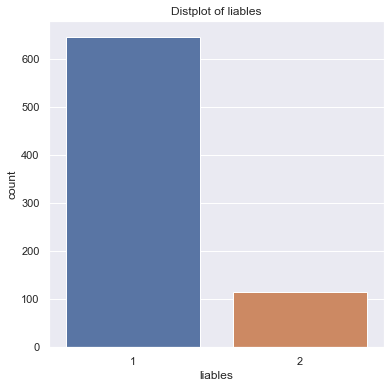

In [96]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['liables'])
plt.title('Distplot of liables') 
plt.show

In [97]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.liables)
chi2_contingency(ct_job, correction = False) #bad predictor

(0.09165242578505177,
 0.9552079505937446,
 2,
 array([[161.28777924,  28.71222076],
        [284.37582129,  50.62417871],
        [200.33639947,  35.66360053]]))

In [98]:
train_df= train_df.drop(['liables'],axis=1)

In [99]:
#telephone(categorical)

In [100]:
train_df['telephone'].value_counts()

A191    457
A192    304
Name: telephone, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

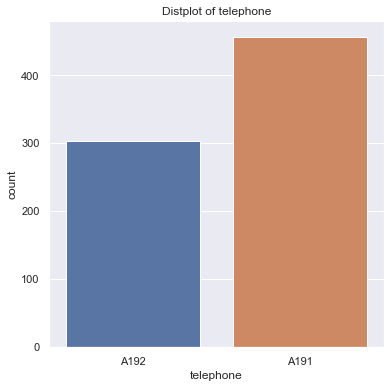

In [101]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['telephone'])
plt.title('Distplot of telephone') 
plt.show

In [102]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.telephone)
chi2_contingency(ct_job,correction = False) #good predictor

(56.81571527553623,
 4.598584649019187e-13,
 2,
 array([[114.09986859,  75.90013141],
        [201.1760841 , 133.8239159 ],
        [141.72404731,  94.27595269]]))

In [103]:
#foreigner(categorical)

In [104]:
train_df['foreigner'].value_counts()

A201    735
A202     26
Name: foreigner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

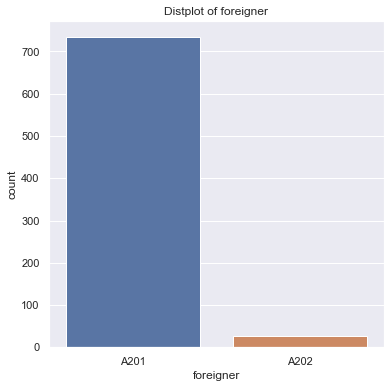

In [105]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(train_df['foreigner'])
plt.title('Distplot of foreigner') 
plt.show

In [106]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(train_df.Group_no,train_df.foreigner)
chi2_contingency(ct_job,correction = False) #good predictor

(9.937748023460017,
 0.006950970341076178,
 2,
 array([[183.50854139,   6.49145861],
        [323.55453351,  11.44546649],
        [227.9369251 ,   8.0630749 ]]))

# Model PreProcessing

In this stage i have converted all the columns into numerical form using label encoding and manual encodeing

In [107]:
#account_info 
train_df['account_info']=train_df.get('account_info').replace('A14',0)
train_df['account_info']=train_df.get('account_info').replace('A11',1)
train_df['account_info']=train_df.get('account_info').replace('A12',2)
train_df['account_info']=train_df.get('account_info').replace('A13',3)

In [108]:
#credit_history 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_df['credit_history']= label_encoder.fit_transform(train_df['credit_history'])

In [109]:
#purpose
train_df['purpose']=label_encoder.fit_transform(train_df['purpose'])

In [110]:
#savings_account
train_df['savings_account']=train_df.get('savings_account').replace('A65',0)
train_df['savings_account']=train_df.get('savings_account').replace('A61',1)
train_df['savings_account']=train_df.get('savings_account').replace('A62',2)
train_df['savings_account']=train_df.get('savings_account').replace('A63',3)
train_df['savings_account']=train_df.get('savings_account').replace('A64',4)

In [111]:
#personal_status
train_df['personal_status']=label_encoder.fit_transform(train_df['personal_status'])

In [112]:
#property_type
train_df['property_type']=label_encoder.fit_transform(train_df['property_type'])

In [113]:
#housing_type
train_df['housing_type']=label_encoder.fit_transform(train_df['housing_type'])

In [114]:
#job_type
train_df['job_type']=label_encoder.fit_transform(train_df['job_type'])

In [115]:
#telephone
train_df['telephone']=label_encoder.fit_transform(train_df['telephone'])

In [116]:
#foreigner
train_df['foreigner']=label_encoder.fit_transform(train_df['foreigner'])

# SMOTE

In [117]:
train_df['Group_no'].value_counts()

2    335
3    236
1    190
Name: Group_no, dtype: int64

In [118]:
#train_df= train_df.drop(['job_type'],axis=1)

In [119]:
equal_1= train_df[train_df.Group_no == 1]
equal_2= train_df[train_df.Group_no == 2]
equal_3= train_df[train_df.Group_no == 3]

In [120]:
from sklearn.utils import resample
def_oversample1 = resample(equal_3, replace = True,n_samples=len(equal_2),random_state=27)

In [121]:
def_oversample1.shape

(335, 14)

In [122]:
from sklearn.utils import resample
def_oversample2= resample(equal_1, replace = True,n_samples=len(equal_2),random_state=27)

In [123]:
def_oversample2.shape

(335, 14)

In [124]:
BCsmote= pd.concat([equal_2, def_oversample1,def_oversample2])

In [125]:
BCsmote['Group_no'].value_counts()

2    335
3    335
1    335
Name: Group_no, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

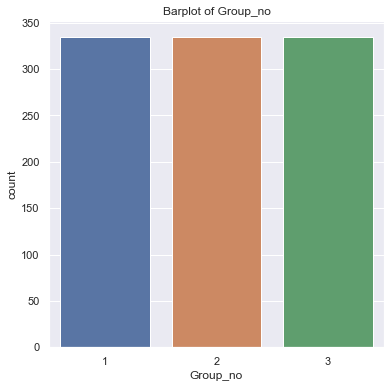

In [126]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(BCsmote['Group_no'])
plt.title('Barplot of Group_no')
plt.show

In [127]:
BCsmote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 2 to 477
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial number    1005 non-null   int64  
 1   account_info     1005 non-null   int64  
 2   duration_month   1005 non-null   float64
 3   credit_history   1005 non-null   int32  
 4   purpose          1005 non-null   int32  
 5   savings_account  1005 non-null   int64  
 6   poi              1005 non-null   float64
 7   personal_status  1005 non-null   int32  
 8   property_type    1005 non-null   int32  
 9   housing_type     1005 non-null   int32  
 10  job_type         1005 non-null   int32  
 11  telephone        1005 non-null   int32  
 12  foreigner        1005 non-null   int32  
 13  Group_no         1005 non-null   int64  
dtypes: float64(2), int32(8), int64(4)
memory usage: 86.4 KB


# Train And Validation

Here I have split the data into train and validation test and also standardized the data using standard scaler

In [128]:
#X and y
X=BCsmote.drop('Group_no',axis=1)
y=BCsmote['Group_no']

In [129]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=45)

In [130]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Model Training

# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [139]:
rfFit=rf.fit(X_train,y_train)

In [140]:
#actual class prediction
y_predRF=rfFit.predict(X_val)

In [141]:
Ran_forr_acc=accuracy_score(y_val,y_predRF)
Ran_forr_acc

0.8258706467661692

# Predicting for test data

Before we predtict for test data first let us analyze the test data

In [185]:
test_df.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [186]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [187]:
#Checking for any NULL values
test_df.isnull().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [188]:
for column in test_df.columns:
    # Check if the column contains null values
    if test_df[column].isnull().sum() > 0:
        # Fill null values with mode of that column
        mode_value = test_df[column].mode()[0]
        test_df[column].fillna(mode_value, inplace=True)

In [189]:
test_df.isnull().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [190]:
#deleting columns which were deleted from train dataset after statistical analysis
test_df= test_df.drop(['liables','credits_no','installment_type','age','resident_since','gurantors','employment_st'],axis=1)

In [191]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial number    200 non-null    int64  
 1   account_info     200 non-null    object 
 2   duration_month   200 non-null    int64  
 3   credit_history   200 non-null    object 
 4   purpose          200 non-null    object 
 5   savings_account  200 non-null    object 
 6   poi              200 non-null    float64
 7   personal_status  200 non-null    object 
 8   property_type    200 non-null    object 
 9   housing_type     200 non-null    object 
 10  job_type         200 non-null    object 
 11  telephone        200 non-null    object 
 12  foreigner        200 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 20.4+ KB


Label Encoding

In [192]:
#account_info 
test_df['account_info']=test_df.get('account_info').replace('A14',0)
test_df['account_info']=test_df.get('account_info').replace('A11',1)
test_df['account_info']=test_df.get('account_info').replace('A12',2)
test_df['account_info']=test_df.get('account_info').replace('A13',3)
#credit_history 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_df['credit_history']= label_encoder.fit_transform(test_df['credit_history'])
#purpose
test_df['purpose']=label_encoder.fit_transform(test_df['purpose'])
#savings_account
test_df['savings_account']=test_df.get('savings_account').replace('A65',0)
test_df['savings_account']=test_df.get('savings_account').replace('A61',1)
test_df['savings_account']=test_df.get('savings_account').replace('A62',2)
test_df['savings_account']=test_df.get('savings_account').replace('A63',3)
test_df['savings_account']=test_df.get('savings_account').replace('A64',4)
#personal_status
test_df['personal_status']=label_encoder.fit_transform(test_df['personal_status'])
#property_type
test_df['property_type']=label_encoder.fit_transform(test_df['property_type'])
#housing_type
test_df['housing_type']=label_encoder.fit_transform(test_df['housing_type'])
#job_type
test_df['job_type']=label_encoder.fit_transform(test_df['job_type'])
#telephone
test_df['telephone']=label_encoder.fit_transform(test_df['telephone'])
#foreigner
test_df['foreigner']=label_encoder.fit_transform(test_df['foreigner'])

In [193]:
test_df.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,poi,personal_status,property_type,housing_type,job_type,telephone,foreigner
0,1,0,24,4,7,1,4.0,2,3,2,2,0,0
1,2,2,18,4,4,1,3.0,1,0,0,1,1,0
2,3,1,20,4,3,1,1.0,1,1,1,2,0,0
3,4,0,12,4,4,0,4.0,2,2,1,2,0,0
4,5,2,12,2,0,0,1.0,1,0,0,0,0,0


In [194]:
X_test=test_df

In [195]:
X_test= sc.transform(X_test)

# Random forest

Using Random Forest Model to predict because the model gave me the best accuracy among all the models

In [196]:
from sklearn.ensemble import RandomForestClassifier
y_pred_test_RF=rfFit.predict(X_test)

In [197]:
y_pred_test_RF

array([2, 1, 2, 2, 3, 1, 3, 3, 1, 3, 3, 2, 2, 1, 1, 1, 2, 3, 1, 2, 3, 2,
       1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1,
       1, 1, 2, 2, 3, 1, 2, 1, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 3, 2, 1, 2, 3, 2, 3,
       2, 3, 3, 1, 3, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2,
       3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 3, 2, 1, 3, 2, 1, 3,
       2, 1], dtype=int64)

In [198]:
# Create submission file
submission_df = pd.DataFrame({'serial number': test_df['serial number'], 'Group_no': y_pred_test_RF})
submission_df.to_csv('submission.csv', index=False)